In [2]:
import xarray as xr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Open the file
ds = xr.open_dataset('/Users/Joey/Desktop/SST_data/sst_1979_2023.nc')

# Print the dataset
print(ds)

<xarray.Dataset> Size: 501MB
Dimensions:    (date: 540, latitude: 161, longitude: 1440)
Coordinates:
    number     int64 8B ...
  * date       (date) int64 4kB 19790101 19790201 19790301 ... 20231101 20231201
  * latitude   (latitude) float64 1kB 90.0 89.75 89.5 89.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    expver     (date) <U4 9kB ...
Data variables:
    sst        (date, latitude, longitude) float32 501MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-21T22:06 GRIB to CDM+CF via cfgrib-0.9.1...


In [3]:
import pandas as pd

# Assuming 'date' is in the format 'YYYYMMDD' (e.g., 19790101)

# Convert 'date' coordinate to a pandas datetime index
ds['date'] = pd.to_datetime(ds['date'].astype(str), format='%Y%m%d')

# Subset the data to September
september = ds.sel(date=ds['date'].dt.month == 9)

# Print the subset
print(september)


<xarray.Dataset> Size: 42MB
Dimensions:    (date: 45, latitude: 161, longitude: 1440)
Coordinates:
    number     int64 8B ...
  * date       (date) datetime64[ns] 360B 1979-09-01 1980-09-01 ... 2023-09-01
  * latitude   (latitude) float64 1kB 90.0 89.75 89.5 89.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    expver     (date) <U4 720B ...
Data variables:
    sst        (date, latitude, longitude) float32 42MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-21T22:06 GRIB to CDM+CF via cfgrib-0.9.1...


(1440,) (161,)


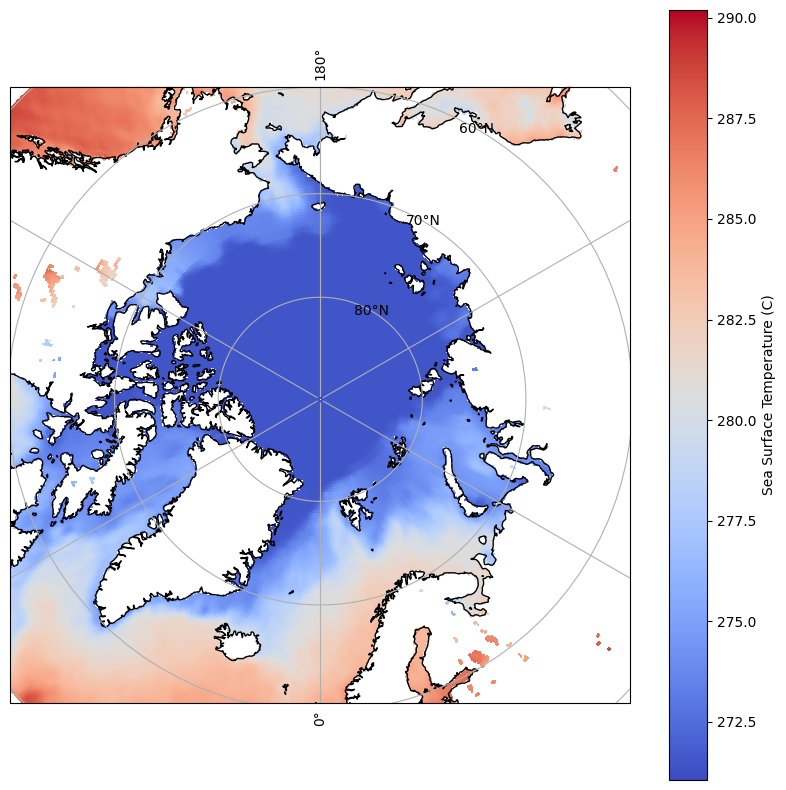

In [13]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a figure and axis
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

# Get the data arrays
if 'sst' in september and 'longitude' in september and 'latitude' in september:
    lon = september['longitude'].values
    lat = september['latitude'].values

    print(lon.shape, lat.shape)

    # Make sure longitude and latitude arrays have compatible shapes
    if lon.ndim == 1 and lat.ndim == 1:
        lon, lat = np.meshgrid(lon, lat)

    # Initialize the plot with the first time step
    sst = september['sst'][0, :, :]  # First time step
    cs = ax.pcolormesh(lon, lat, sst, transform=ccrs.PlateCarree(), cmap='coolwarm', shading='auto')
    cbar = plt.colorbar(cs, ax=ax, orientation='vertical', label='Sea Surface Temperature (C)')

    # Update function for animation
    def update(frame):
        while ax.collections:
            ax.collections[0].remove()  # Safely remove each collection
        sst = september['sst'][frame, :, :]  # Update for the current year (frame)
        cs = ax.pcolormesh(lon, lat, sst, transform=ccrs.PlateCarree(), cmap='coolwarm', shading='auto')
        ax.set_title(f'September Sea Surface Temperature (Year: {1979 + frame})')

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=len(september['date']), repeat=True)

    # Display the animation
    plt.show()
    ani.save('sst_animation.gif', writer='pillow', fps=2)

else:
    print("Error: 'sst', 'longitude', or 'latitude' not found in the dataset.")
